In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os
from scipy.stats import linregress

In [2]:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

3.4039020340390205 2.1037271514110163
[ 2  3  4  5  6  7  8 12 16 20]


<ipython-input-3-d7026f97a87c>:149: RuntimeWarning: overflow encountered in true_divide
  cost_total.append(list(Nl_list_large[k]/P_eff_interpolate(p_keep)))
<ipython-input-3-d7026f97a87c>:149: RuntimeWarning: divide by zero encountered in true_divide
  cost_total.append(list(Nl_list_large[k]/P_eff_interpolate(p_keep)))


[ 2  3  4  5  6  7  8 12 16 20]


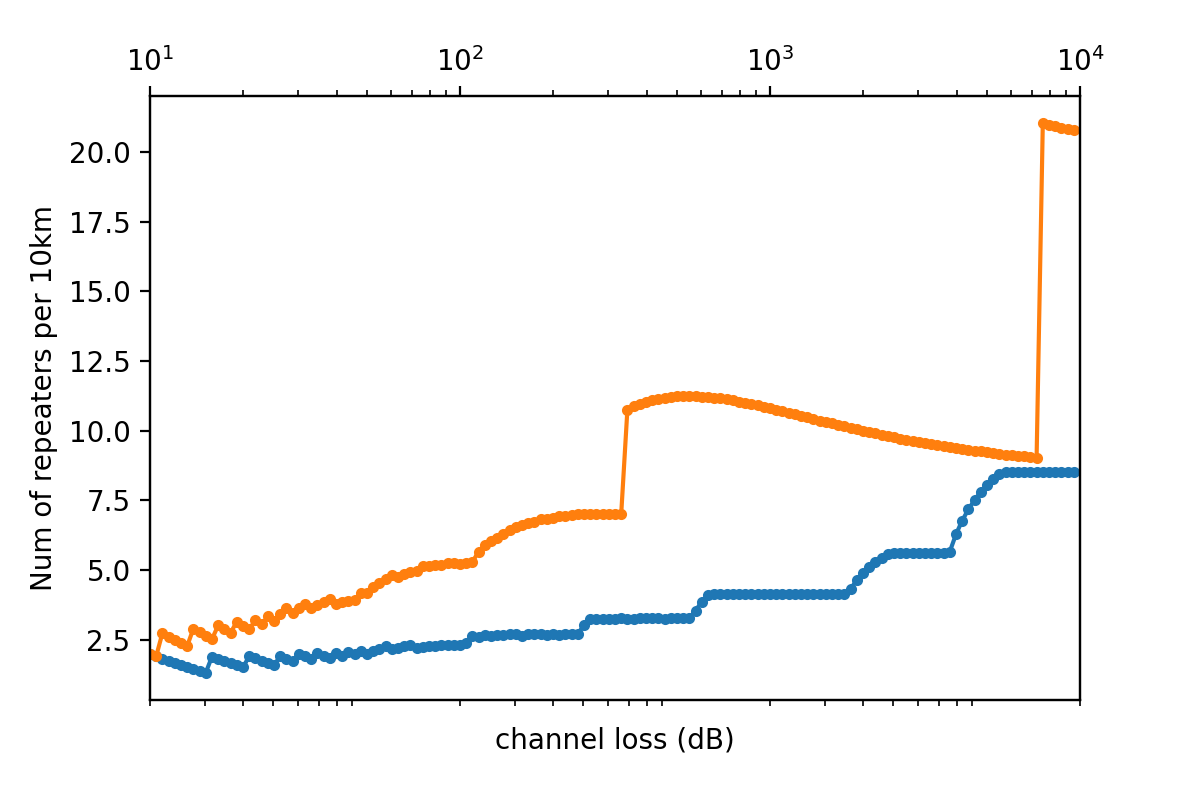

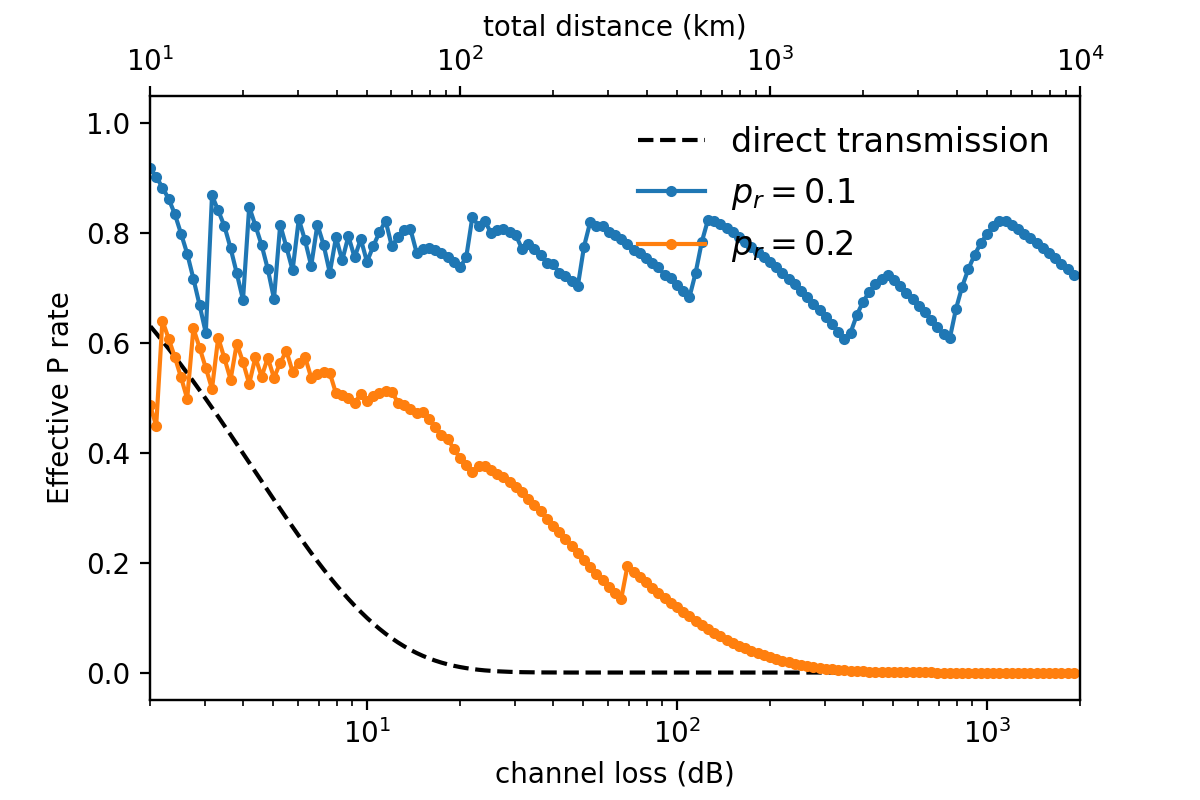

In [3]:
# load style file
import matplotlib.font_manager
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
import phd_plot_style
pub_fig_style = phd_plot_style.phd_revtex_plots()

# magic commands

%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None, 'dpi': 200}

# Colors
cBlues = sns.color_palette("Blues_r", n_colors=7)#[::3]
cOranges = sns.color_palette("Oranges_r", n_colors=7)#[::3]#[1:-1]
cGreens = sns.color_palette("Greens_r", n_colors=7)#[::3]#[1:-1]
cPurples = sns.color_palette("Purples_r", n_colors=7)#[::3]#[1:-1]
cGreys = sns.color_palette("PuRd_r", n_colors=7)#[::3]#[1:-1]
color_zip = [cPurples, cBlues, cOranges, cGreens, cGreys]

# define dimensions
fig_width  = pub_fig_style.revtex_sizes_active["page.columnwidth"] * pub_fig_style.tex_pt_to_inch
fig_height = pub_fig_style._get_revtex_rc()["figure.figsize"][1]
print(fig_width, fig_height)

import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

def file_reader_ldpc(fname_in,Nq,repeat,even_odd):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            if even_odd == "odd":
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_X'], npz_file['succ_prob_X'],  npz_file['p_list'], npz_file['Nrep']
            else:
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_Z'], npz_file['succ_prob_Z'],  npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_avg = np.zeros((len(p_list),Nq))
                succ_prob_word_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            succ_prob_word_avg += succ_prob_word*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, succ_prob_word_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0,0
    
p_r_list = [0.1,0.2]
fname_l = ["48q_pr10_p.npz","48q_pr20_p.npz"]
filename_l = ["48q_pr10_p.npz","48q_pr20_p.npz"]
legend_l = ['$p_r = 0.1$','$p_r = 0.2$']

for k_j in range(len(p_r_list)):
    p_r = p_r_list[k_j]
    p_repeater = 1 - p_r
    repeat = 200
    Nl_small = np.arange(2,9)
    Nl_large =  np.arange(12,21,4)
    Nl_list = np.concatenate((Nl_small,Nl_large))
    print(Nl_list)
    #Nl_list = np.arange(2,9,1)
    ind_p_list = np.arange(0,20,1)
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))
    
    
    bdy = True
    for i_L, Nl in enumerate(Nl_list):
        f1 = "data_48q/" + "even_Nl_%d" % (Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
        #succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        #plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
            
        f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        # succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]*np.mean(succ_prob_repeater,axis=1)
        # succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)
        succ_prob_avg[:,i_L] = np.mean(succ_prob_odd[ind_p_list,:] ,axis=1)
    
    succ_prob_avg_avg_array = succ_prob_avg.T
    succ_prob_tot = []
    Nl_list_large = []
    tot_layer = 30000
    for k in range(1,tot_layer):
        Nl_list_large.append((k+1))
    p_list0 = []
    P_fit_list = []
    Nl_fit_list = []
    for k in range(succ_prob_avg_avg_array.shape[1]):
        P_fit1 = []
        Nl_fit1 = []
        for j in range(succ_prob_avg_avg_array.shape[0]):
            if succ_prob_avg_avg_array[j,k] > 0:
                P_fit1.append(succ_prob_avg_avg_array[j,k])
                Nl_fit1.append(Nl_list[j])
        P_fit_list.append(P_fit1)
        Nl_fit_list.append(Nl_fit1)
        
    Nl_tot = len(list(Nl_list))
    for k in range(succ_prob_avg_avg_array.shape[1]):
        m,b = np.polyfit(Nl_fit_list[k], np.log(P_fit_list[k]), 1)
        if m < 0:
            succ_prob_tot.append(list(np.exp(m * np.array(Nl_list_large) + b)))
            p_list0.append(p_list[k])
    succ_prob_tot_array = np.array(succ_prob_tot)
    
    L_tot1 = 10**(np.arange(0,4,0.02))
    P_DT = 10**(-0.02*L_tot1)

### Nl_list_large Fig 4,5:
    fname = fname_l[k_j]
    succ_prob_avg_avg_list = list(succ_prob_tot_array.T)
    t_list = 1-np.array(p_list0)
    t_list = list(t_list)
    t_list.append(0)
    t_list.reverse()
    t_list.append(1)
    L_tot = 10**np.arange(0,4,0.02)

    each_dis_Peff_list = []
    P_optimal_list = []
    P_optimal_base = []
    Arrange_P_optimal_list = []
    cost_total = []
    for k in range(0,len(succ_prob_avg_avg_list)):
        succ_prob_avg_avg_list0 = list(succ_prob_avg_avg_list[k].copy())
        succ_prob_avg_avg_list0.append(0)
        succ_prob_avg_avg_list0.reverse()
        succ_prob_avg_avg_list0.append(1)
        P_eff_interpolate = interp1d(t_list, succ_prob_avg_avg_list0)
        #P_eff_interpolate = CubicSpline(t_list, succ_prob_avg_avg_list0, bc_type='natural')
        Num_repeater = Nl_list_large[k]
        p_keep = p_repeater*10**(-0.02*L_tot/Num_repeater)
        P_optimal_base.append(list(P_eff_interpolate(p_keep)))
        cost_total.append(list(Nl_list_large[k]/P_eff_interpolate(p_keep)))
    P_optimal_base = np.array(P_optimal_base)
    cost_total = np.array(cost_total)
    ### calculate cost:
    index_max = []
    P_max = []
    N_optimal_max = []
    P_ori_max = []
    index_Pori_max = []
    for k in range(len(L_tot)):
        cost_range = []
        P_max_range = []
        Nl_large_range = []
        
        '''
        for j_l in range(len(cost_total[:,k])):
            if P_optimal_base[j_l,k] > P_DT[k]:
                P_max_range.append(P_optimal_base[j_l,k])
                cost_range.append(cost_total[j_l,k])
                Nl_large_range.append(Nl_list_large[j_l])
        index_max.append(np.argmin(cost_range))
        P_max.append(P_max_range[index_max[k]])
        P_ori_max.append(max(P_optimal_base[:,k]))
        index_Pori_max.append(Nl_list_large[np.argmax(P_optimal_base[:,k])])
        N_optimal_max.append(Nl_large_range[index_max[k]])
        '''
        index_max.append(np.argmin(cost_total[:,k]))
        P_max.append(P_optimal_base[index_max[k],k])
        P_ori_max.append(max(P_optimal_base[:,k]))
        index_Pori_max.append(Nl_list_large[np.argmax(P_optimal_base[:,k])])
        N_optimal_max.append(Nl_list_large[index_max[k]])
    N_optimal_per10 = []
    for k in range(L_tot.shape[0]):
        N_optimal_per10.append(N_optimal_max[k] / L_tot[k] * 10)
    np.savez(fname, index_Pori_max = index_Pori_max, \
             P_ori_max = P_ori_max, N_optimal_per10 = N_optimal_per10,\
             P_max = P_max, index_max = index_max,\
             N_optimal_max=N_optimal_max, p_repeater = p_repeater,\
             L_tot = L_tot)

### Fig 4_1
fig = plt.figure()
ax1 = fig.add_subplot(111)
for k in range(len(filename_l)):
    fname = filename_l[k]
    if os.path.exists(fname):
        npz_file = np.load(fname)
        L_tot, N_optimal_per10 = npz_file['L_tot'], npz_file['N_optimal_per10']
        N_optimal_max = npz_file['N_optimal_max']
        index_Pori_max = npz_file['index_Pori_max']
        ax1.plot(L_tot*0.2, N_optimal_per10, '.-', label = legend_l[k])
ax1.set_xlabel("channel loss (dB)")
ax1.set_ylabel("Num of repeaters per 10km")
ax1.set_xlim(2, 2000)
#ax1.set_ylim(0,10)
ax1.set_xscale("log")
ax1.set_xticks([])
ax2 = ax1.twiny()
ax2.set_xlim(10, 10000)
ax2.set_xscale("log")
plt.savefig('Fig4_48q_1.pdf')
plt.show()

### Fig 4_2
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(L_tot1*0.2,P_DT,'--',color='k',label='direct transmission')
for k in range(len(filename_l)):
    fname = filename_l[k]
    if os.path.exists(fname):
        npz_file = np.load(fname)
        L_tot, P_max, P_ori_max= npz_file['L_tot'], npz_file['P_max'], npz_file['P_ori_max']
        ax1.plot(L_tot*0.2, P_max, '.-', label = legend_l[k])
        #ax1.plot(L_tot*0.2, P_ori_max, '.-', label = legend_l[k])
ax1.set_xlabel("channel loss (dB)")
ax1.set_ylabel("Effective P rate")
ax1.set_xlim(2, 2000)
ax1.set_xscale("log")
ax2 = ax1.twiny()
ax2.set_xlabel("total distance (km)")
ax2.set_xlim(10, 10000)
ax2.set_xscale("log")
ax1.legend(loc = "upper right",fontsize='large',frameon=False,ncol=1)
plt.savefig('Fig4_48q_2.pdf')
plt.show()

# interpolate slope

In [14]:
p_r_list = [0.15,0.1,0.05]
fname_l = ["48q_pr15_p.npz","48q_pr10_p.npz","48q_pr05_p.npz"]
filename_l = fname_l
legend_l = [r'$\eta_r = 0.85$',r'$\eta_r = 0.90$',r'$\eta_r = 0.95$']

for k_j in range(len(p_r_list)):
    fname = fname_l[k_j]
    p_r = p_r_list[k_j]
    p_repeater = 1 - p_r
    repeat = 200
    Nl_small = np.arange(2,9)
    Nl_large =  np.arange(12,30,4)
    Nl_list = np.concatenate((Nl_small,Nl_large))
    ind_p_list = np.arange(0,15,1)
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))    
    
    bdy = True
    for i_L, Nl in enumerate(Nl_list):
        f1 = "data_48q/" + "even_Nl_%d" % (Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        #plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
            
        f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
        # succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]*np.mean(succ_prob_repeater,axis=1)
        succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)
        #succ_prob_avg[:,i_L] = np.mean(succ_prob_odd[ind_p_list,:] ,axis=1)
    
    slope = np.zeros(len(ind_p_list))
    intercept = np.zeros(len(ind_p_list))
    std_err = np.zeros(len(ind_p_list))

    for i_p, ind_p in enumerate(ind_p_list):
        i_s = np.argwhere(succ_prob_avg[i_p,:]>0)[:,0]
        slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log(succ_prob_avg[i_p,i_s]))

    d_list = np.logspace(1,4,200) #10**np.linspace(1.5,2,5)#
    cost = np.zeros((len(ind_p_list),len(d_list)))
    unit_dist = np.zeros(len(ind_p_list))

    Nl_opt = np.zeros(len(d_list))
    p_opt = np.zeros(len(d_list))

    for i_d, d_tot in enumerate(d_list):
        # print(d_tot)
        if d_tot>10:
            N_sw = np.arange(2,(d_tot/4)*20)
        else:
            N_sw = np.arange(1,20)#(d_tot/4)*10)
        cost = np.zeros(len(N_sw))
        p_eff = np.zeros(len(N_sw))
        p_val = 1-(1-p_r)*10**(-0.02*d_tot/(N_sw+1))
        # if Nl== 2000:
        #     print(1-p_val)
        slope_val = np.interp(p_val,p_list[ind_p_list], slope)
        intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
        for i_N, Nl in enumerate(N_sw):
            p_eff[i_N] = np.exp(intercept_val[i_N]+slope_val[i_N]*(1+Nl))
            cost[i_N] = Nl/d_tot/p_eff[i_N]

        # i_1 = np.argsort(cost)
        # if p_eff[i_1[0]]> p_eff[i_1[1]]:
        #     Nl_opt[i_d] = N_sw[i_1[0]]
        #     p_opt[i_d] = p_eff[i_1[0]]
        # else:
        #     Nl_opt[i_d] = N_sw[i_1[1]]
        #     p_opt[i_d] = p_eff[i_1[1]]
        i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
        # print(i_1)
        if len(i_1)>0:
            Nl_opt[i_d] = N_sw[i_1[0,0]]
            p_opt[i_d] = p_eff[i_1[0,0]]
            if 10/(d_tot/Nl_opt[i_d])> 10:
                Nl_opt[i_d] = int(d_tot)
                p_opt[i_d] = p_eff[np.argwhere(N_sw==int(d_tot))]
        else:
            Nl_opt[i_d] = N_sw[0]
            p_opt[i_d] = p_eff[0]
    np.savez(fname, Nl_opt = Nl_opt, p_opt = p_opt, d_list = d_list)

# Plot:

## Plot1: performance

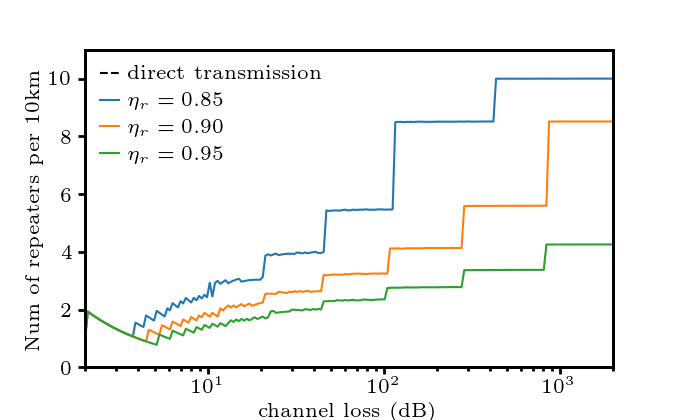

In [15]:
import matplotlib.pylab as pylab
p_r_list = [0.15,0.1,0.05]
fname_l = ["48q_pr15_p.npz","48q_pr10_p.npz","48q_pr05_p.npz"]
filename_l = fname_l
legend_l = [r'$\eta_r = 0.85$',r'$\eta_r = 0.90$',r'$\eta_r = 0.95$']

### Fig 4_1
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    params = {'legend.fontsize':'x-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(0,0,'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, 10/(d_list/Nl_opt), '-', label = legend_l[k])
    ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel("Num of repeaters per 10km")
    ax1.set_xlim(2, 2000)
    ax1.set_ylim(0, 11)
    ax1.set_xscale("log")
    ax1.legend(loc="upper left",ncol=1,frameon=False)
    xtick = [0,100,200]
    xtick_labels = ['0','100','200']
    #plt.xticks(xtick, xtick_labels)
    ax2 = ax1.twiny()
    ax2.set_xticks([])
    plt.savefig('optimized_performance_arrangement_1.pdf')
    plt.show()

## Plot2: arrangement

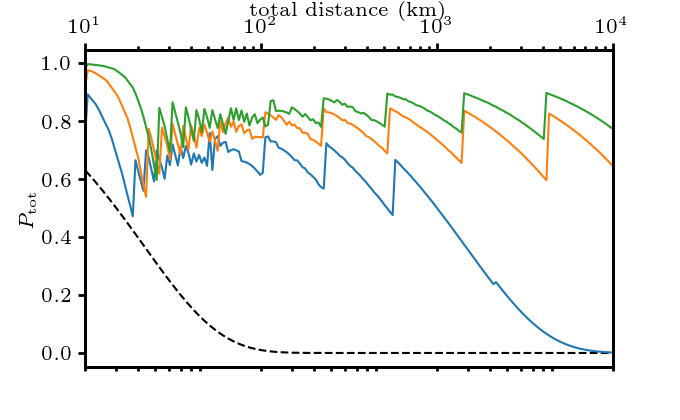

In [18]:
### Fig 4_2
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    import matplotlib.pylab as pylab
    params = {'legend.fontsize':'xx-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(L_tot1*0.2,P_DT,'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, p_opt, '-', label = legend_l[k])
    #ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel(r"$P_{\text{tot}}$")
    ax1.set_xlim(2, 2000)
    ax1.set_xscale("log")
    ax1.set_xticks([])
    ax2 = ax1.twiny()
    ax2.set_xlabel("total distance (km)")
    ax2.set_xlim(10, 10000)
    ax2.set_xscale("log")
    plt.savefig('optimized_performance_arrangement_2.pdf')
    plt.show()

### secret key rate

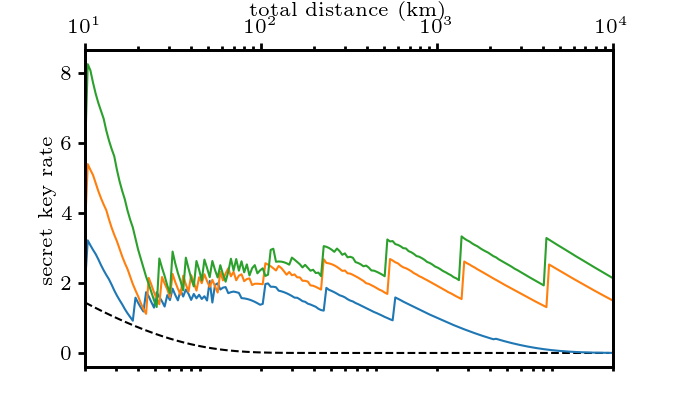

In [7]:
### Fig 4_2
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    import matplotlib.pylab as pylab
    params = {'legend.fontsize':'xx-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(L_tot1*0.2,-np.log2(1-P_DT),'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, -np.log2(1-p_opt), '-', label = legend_l[k])
    #ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel("secret key rate")
    ax1.set_xlim(2, 2000)
    ax1.set_xscale("log")
    ax1.set_xticks([])
    ax2 = ax1.twiny()
    ax2.set_xlabel("total distance (km)")
    ax2.set_xlim(10, 10000)
    ax2.set_xscale("log")
    plt.savefig('optimized_performance_arrangement_skr.pdf')
    plt.show()

## 7q

In [8]:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

In [9]:
p_r_list = [0.1,0.05]
legend_l = [r'$\eta_r=0.9$',r'$\eta_r=0.95$']
fname_l = ["7q_pr10_p.npz","7q_pr05_p.npz"]
filename_l = fname_l

for k_j in range(len(p_r_list)):
    fname = fname_l[k_j]
    repeat = 100
    p_r = p_r_list[k_j]
    Nl_list = np.arange(2,31,2)
    ind_p_list = np.arange(0,15,1)#[8,11,14]
    # ind_p_list = [8]
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

    bdy = True
    for i_L, Nl in enumerate(Nl_list):
        # print(Nl)
        f1 = "data_7q/" + "even_Nl_%d" % (Nl)
        succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]


        f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
        succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater    

    slope = np.zeros(len(ind_p_list))
    intercept = np.zeros(len(ind_p_list))
    std_err = np.zeros(len(ind_p_list))

    for i_p, ind_p in enumerate(ind_p_list):
        i_s = np.argwhere(succ_prob_avg[i_p,:]>0)[:,0]
        slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log(succ_prob_avg[i_p,i_s]))

    d_list = np.logspace(1,4,200)
    cost = np.zeros((len(ind_p_list),len(d_list)))
    unit_dist = np.zeros(len(ind_p_list))

    Nl_opt = np.zeros(len(d_list))
    p_opt = np.zeros(len(d_list))

    for i_d, d_tot in enumerate(d_list):
        # print(d_tot)
        N_sw = np.arange(2,d_tot*2)
        cost = np.zeros(len(N_sw))
        p_eff = np.zeros(len(N_sw))
        p_val = 1-(1-p_r)*10**(-0.02*d_tot/N_sw)
        # if Nl== 2000:
        #     print(1-p_val)
        slope_val = np.interp(p_val,p_list[ind_p_list], slope)
        intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
        for i_N, Nl in enumerate(N_sw):
            p_eff[i_N] = np.exp(intercept_val[i_N]+slope_val[i_N]*Nl)
            cost[i_N] = Nl/d_tot/p_eff[i_N]
        # i_1 = np.argsort(cost)
        # if p_eff[i_1[0]]> p_eff[i_1[1]]:
        #     Nl_opt[i_d] = N_sw[i_1[0]]
        #     p_opt[i_d] = p_eff[i_1[0]]
        # else:
        #     Nl_opt[i_d] = N_sw[i_1[1]]
        #     p_opt[i_d] = p_eff[i_1[1]]
        i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
        if len(i_1)>0:
            Nl_opt[i_d] = N_sw[i_1[0,0]]
            p_opt[i_d] = p_eff[i_1[0,0]]
        else:
            Nl_opt[i_d] = N_sw[0]
            p_opt[i_d] = p_eff[0]
    np.savez(fname, Nl_opt = Nl_opt, p_opt = p_opt, d_list = d_list)

In [10]:
'''
p_r_list = [0.1,0.05]
legend_l = [r'$\eta_r=0.9$',r'$\eta_r=0.95$']
fname_l = ["7q_pr10_p.npz","7q_pr05_p.npz"]
filename_l = fname_l

for k_j in range(len(p_r_list)):
    repeat = 100
    p_r = p_r_list[k_j]
    Nl_list = np.arange(2,31,2)
    ind_p_list = np.arange(0,15,1)
    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))
    
    bdy = True
    for i_L, Nl in enumerate(Nl_list):
        f1 = "data_7q/" + "even_Nl_%d" % (Nl)
        # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
        succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
        # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)

        # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
        f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
        succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
        succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    
    slope = np.zeros(len(ind_p_list))
    intercept = np.zeros(len(ind_p_list))
    std_err = np.zeros(len(ind_p_list))

    for i_p, ind_p in enumerate(ind_p_list):
        i_s = np.argwhere(succ_prob_avg[i_p,:]>0)[:,0]
        slope[i_p], intercept[i_p], r_value, p_value, std_err[i_p] = linregress(Nl_list[i_s], np.log(succ_prob_avg[i_p,i_s]))

    d_list = np.logspace(1,3,40) #10**np.linspace(1.5,2,5)#
    cost = np.zeros((len(ind_p_list),len(d_list)))
    unit_dist = np.zeros(len(ind_p_list))

    Nl_opt = np.zeros(len(d_list))
    p_opt = np.zeros(len(d_list))

    for i_d, d_tot in enumerate(d_list):
        # print(d_tot)
        if d_tot>10:
            N_sw = np.arange(2,(d_tot/4)*20)
        else:
            N_sw = np.arange(1,20)#(d_tot/4)*10)
        cost = np.zeros(len(N_sw))
        p_eff = np.zeros(len(N_sw))
        p_val = 1-(1-p_r)*10**(-0.02*d_tot/(N_sw+1))
        # if Nl== 2000:
        #     print(1-p_val)
        slope_val = np.interp(p_val,p_list[ind_p_list], slope)
        intercept_val = np.interp(p_val,p_list[ind_p_list], intercept)
        for i_N, Nl in enumerate(N_sw):
            p_eff[i_N] = np.exp(intercept_val[i_N]+slope_val[i_N]*(1+Nl))
            cost[i_N] = Nl/d_tot/p_eff[i_N]

        # i_1 = np.argsort(cost)
        # if p_eff[i_1[0]]> p_eff[i_1[1]]:
        #     Nl_opt[i_d] = N_sw[i_1[0]]
        #     p_opt[i_d] = p_eff[i_1[0]]
        # else:
        #     Nl_opt[i_d] = N_sw[i_1[1]]
        #     p_opt[i_d] = p_eff[i_1[1]]
        i_1 = len(N_sw)-1-np.argwhere(np.diff(cost[::-1])>0)
        # print(i_1)
        if len(i_1)>0:
            Nl_opt[i_d] = N_sw[i_1[0,0]]
            p_opt[i_d] = p_eff[i_1[0,0]]
            if 10/(d_tot/Nl_opt[i_d])> 10:
                Nl_opt[i_d] = int(d_tot)
                p_opt[i_d] = p_eff[np.argwhere(N_sw==int(d_tot))]
        else:
            Nl_opt[i_d] = N_sw[0]
            p_opt[i_d] = p_eff[0]
    np.savez(fname, Nl_opt = Nl_opt, p_opt = p_opt, d_list = d_list)
    '''

'\np_r_list = [0.1,0.05]\nlegend_l = [r\'$\\eta_r=0.9$\',r\'$\\eta_r=0.95$\']\nfname_l = ["7q_pr10_p.npz","7q_pr05_p.npz"]\nfilename_l = fname_l\n\nfor k_j in range(len(p_r_list)):\n    repeat = 100\n    p_r = p_r_list[k_j]\n    Nl_list = np.arange(2,31,2)\n    ind_p_list = np.arange(0,15,1)\n    succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))\n    \n    bdy = True\n    for i_L, Nl in enumerate(Nl_list):\n        f1 = "data_7q/" + "even_Nl_%d" % (Nl)\n        # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)\n        succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) \n        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]\n        # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)\n\n        # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)\n        f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)\n        succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) \n        succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_p

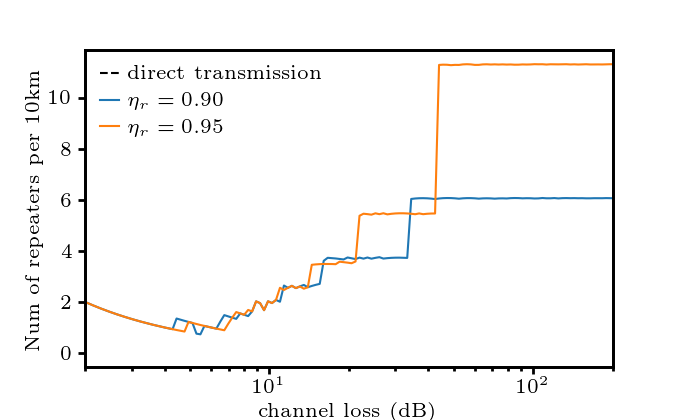

In [11]:
fname_l = ["7q_pr10_p.npz","7q_pr05_p.npz"]
filename_l = fname_l
legend_l = [r'$\eta_r = 0.90$',r'$\eta_r = 0.95$']

### Fig 4_1
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    import matplotlib.pylab as pylab
    params = {'legend.fontsize':'x-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(0,0,'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, 10/(d_list/Nl_opt), '-', label = legend_l[k])
    ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel("Num of repeaters per 10km")
    ax1.set_xlim(2, 200)
    #ax1.set_ylim(0, 11)
    ax1.set_xscale("log")
    ax1.legend(loc="upper left",ncol=1,frameon=False)
    xtick = [0,100,200]
    xtick_labels = ['0','100','200']
    #plt.xticks(xtick, xtick_labels)
    ax2 = ax1.twiny()
    ax2.set_xticks([])
    plt.savefig('optimized_performance_arrangement_1_7q.pdf')
    plt.show()

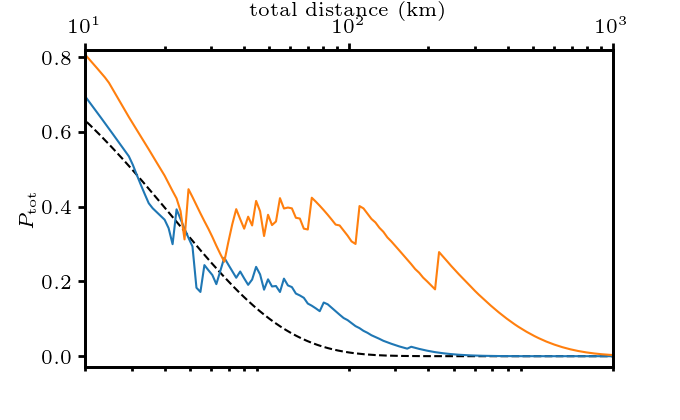

In [12]:
### Fig 4_2
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    import matplotlib.pylab as pylab
    params = {'legend.fontsize':'xx-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(L_tot1*0.2,P_DT,'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, p_opt, '-', label = legend_l[k])
    #ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel(r"$P_{\text{tot}}$")
    ax1.set_xlim(2, 200)
    ax1.set_ylim(-0.03, 0.82)
    ax1.set_xscale("log")
    ax1.set_xticks([])
    ax2 = ax1.twiny()
    ax2.set_xlabel("total distance (km)")
    ax2.set_xlim(10, 1000)
    ax2.set_xscale("log")
    plt.savefig('optimized_performance_arrangement_2_7q.pdf')
    plt.show()

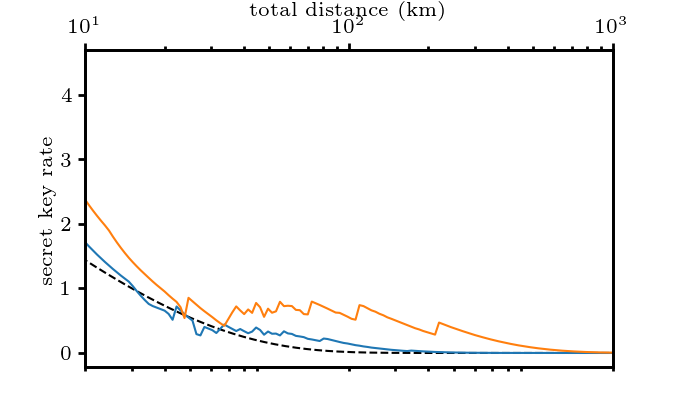

In [13]:
### Fig 4_2
fig = plt.figure(figsize = (fig_width, fig_height))
with mpl.rc_context(pub_fig_style._get_revtex_rc()):
    import matplotlib.pylab as pylab
    params = {'legend.fontsize':'xx-small',
             'axes.labelsize':'x-small',
             'axes.titlesize':'x-small',
             'xtick.labelsize':'x-small',
             'ytick.labelsize':'x-small'}
    pylab.rcParams.update(params)
    ax1 = fig.add_subplot(111)
    ax1.plot(L_tot1*0.2,-np.log2(1-P_DT),'--',color='k',label='direct transmission')
    for k in range(len(filename_l)):
        fname = filename_l[k]
        if os.path.exists(fname):
            npz_file = np.load(fname)
            Nl_opt,p_opt,d_list = npz_file['Nl_opt'], npz_file['p_opt'], npz_file['d_list']
            ax1.plot(d_list*0.2, -np.log2(1-p_opt), '-', label = legend_l[k])
    #ax1.set_xlabel("channel loss (dB)")
    ax1.set_ylabel("secret key rate")
    ax1.set_xlim(2, 200)
    ax1.set_xscale("log")
    ax1.set_xticks([])
    ax2 = ax1.twiny()
    ax2.set_xlabel("total distance (km)")
    ax2.set_xlim(10, 1000)
    ax2.set_xscale("log")
    plt.savefig('optimized_performance_arrangement_skr_7q.pdf')
    plt.show()